# Advanced Regression Assignment

### Problem Statement:

A US-based housing company 'Suprise Housing' has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher rate.

A model is to be built using regression to predict the actual value of the prospective properties and decide wether to in invest in them or not.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
# Tweaking the default display parameters
pd.options.display.max_columns = 440
pd.options.display.max_rows = 440

In [3]:
df = pd.read_csv("train.csv")
print('Shape of dataframe : ',df.shape)
df.head()

Shape of dataframe :  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Creating a copy of the original dataset to work on
houses = original_dataset.copy()
houses.shape

NameError: name 'original_dataset' is not defined

In [ ]:
# dropping the 'Id' column
df.drop(['Id'], axis=1, inplace=True)
df.shape

### Missing Value Percentage

In [5]:
def missing_values_percent(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
  missing_data  = pd.concat([total, percent], axis=1, keys=['Count', 'Percentage'])
  missing_data = missing_data[missing_data['Percentage'] > 0]
  return missing_data 

In [6]:
missing_values_percent(df)

,Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


##### Observation
Deleting features with more than 15% missing values

In [7]:
print(' Shape of data before deleting: ',df.shape)
mv = missing_values_percent(df)
mv = mv[mv['Percentage']>15]
print('Number of columns to delete :',len(list(mv.index)))
print('Column names: ',mv.index)
train_data = df.drop(columns=list(mv.index)).copy()
print(' Shape of data after deletion: ',train_data.shape)

 Shape of data before deleting:  (1460, 81)
Number of columns to delete : 6
Column names:  Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')
 Shape of data after deletion:  (1460, 75)


In [8]:
#recheck the missing values
df=train_data
missing_values_percent(df)

,Count,Percentage
GarageType,81,5.547945
GarageCond,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
BsmtFinType2,38,2.602740
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247


##### Imputing NAN values

In [9]:
#Imputing the NaN values with 'no garage' 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt'):
    df[col] = df[col].fillna('No_Garage')
# Imputing the Nan Values with 'No Basementh_data'
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    df[col] = df[col].fillna('No_Basement')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['Electrical'] = df['Electrical'].fillna("Other")

### EDA

##### Distribution of target variable : SalePrice

In [10]:
# summary stats of target variable
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

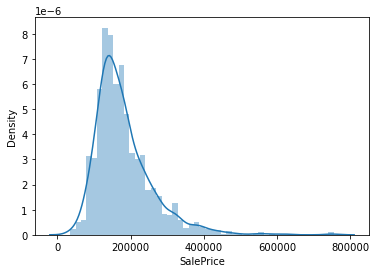

In [11]:
#histogram
sns.distplot(df['SalePrice']);

###### Observation:
Saleprice doesn't have a normal distribution
Target variable is right skewed

Let us now look at the feature distribution

In [12]:
## Getting the correlation of all the features with target variable. 
(df.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
MasVnrArea       0.223364
Fireplaces       0.218023
BsmtFinSF1       0.149320
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

These are the predictor variables sorted in a descending order. overallqual is the most correlated variable with target variable

###### Distribution of numeric Variables

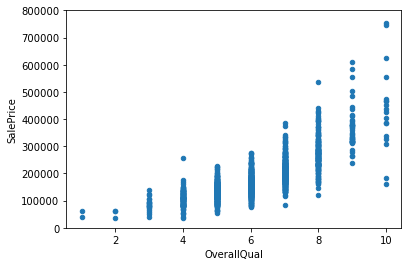

In [13]:
#Distribution of OverallQual
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
data.plot.scatter(x='OverallQual', y='SalePrice', ylim=(0,800000));

###### Observation:
Sale price is high if overallqual is 10

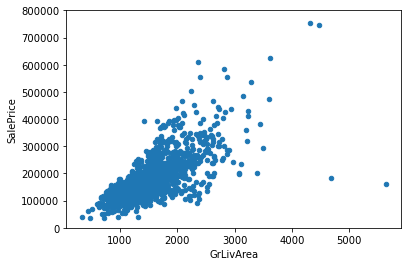

In [14]:
#Distribution of GrLivArea
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

###### Observation:
GrliveArea and saleprice seem have a good linear relationship

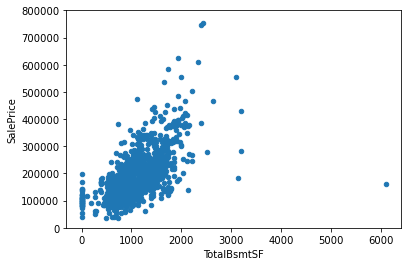

In [15]:
#Distribution of OverallQual
data = pd.concat([df['SalePrice'], df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

###### Observation:
TotalBsmtSF and saleprice also seem have a good linear relationship

###### Distribution of categorical variables

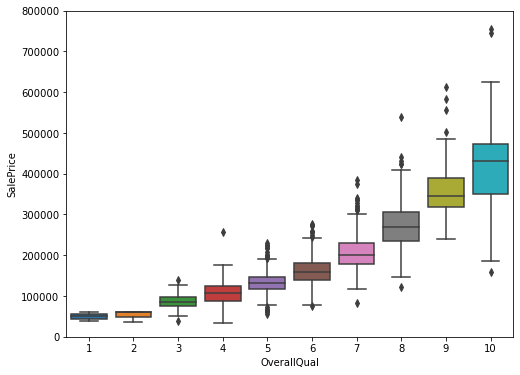

In [16]:
#box plot overallqual/saleprice
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Text(0.5, 1.0, 'Overall Condition')

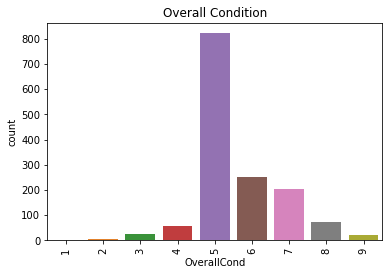

In [17]:
sns.countplot(x='OverallCond', data= df).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

###### Observation:
Sale price is high if Overallcond is 5

###### Dropping highly correlated features

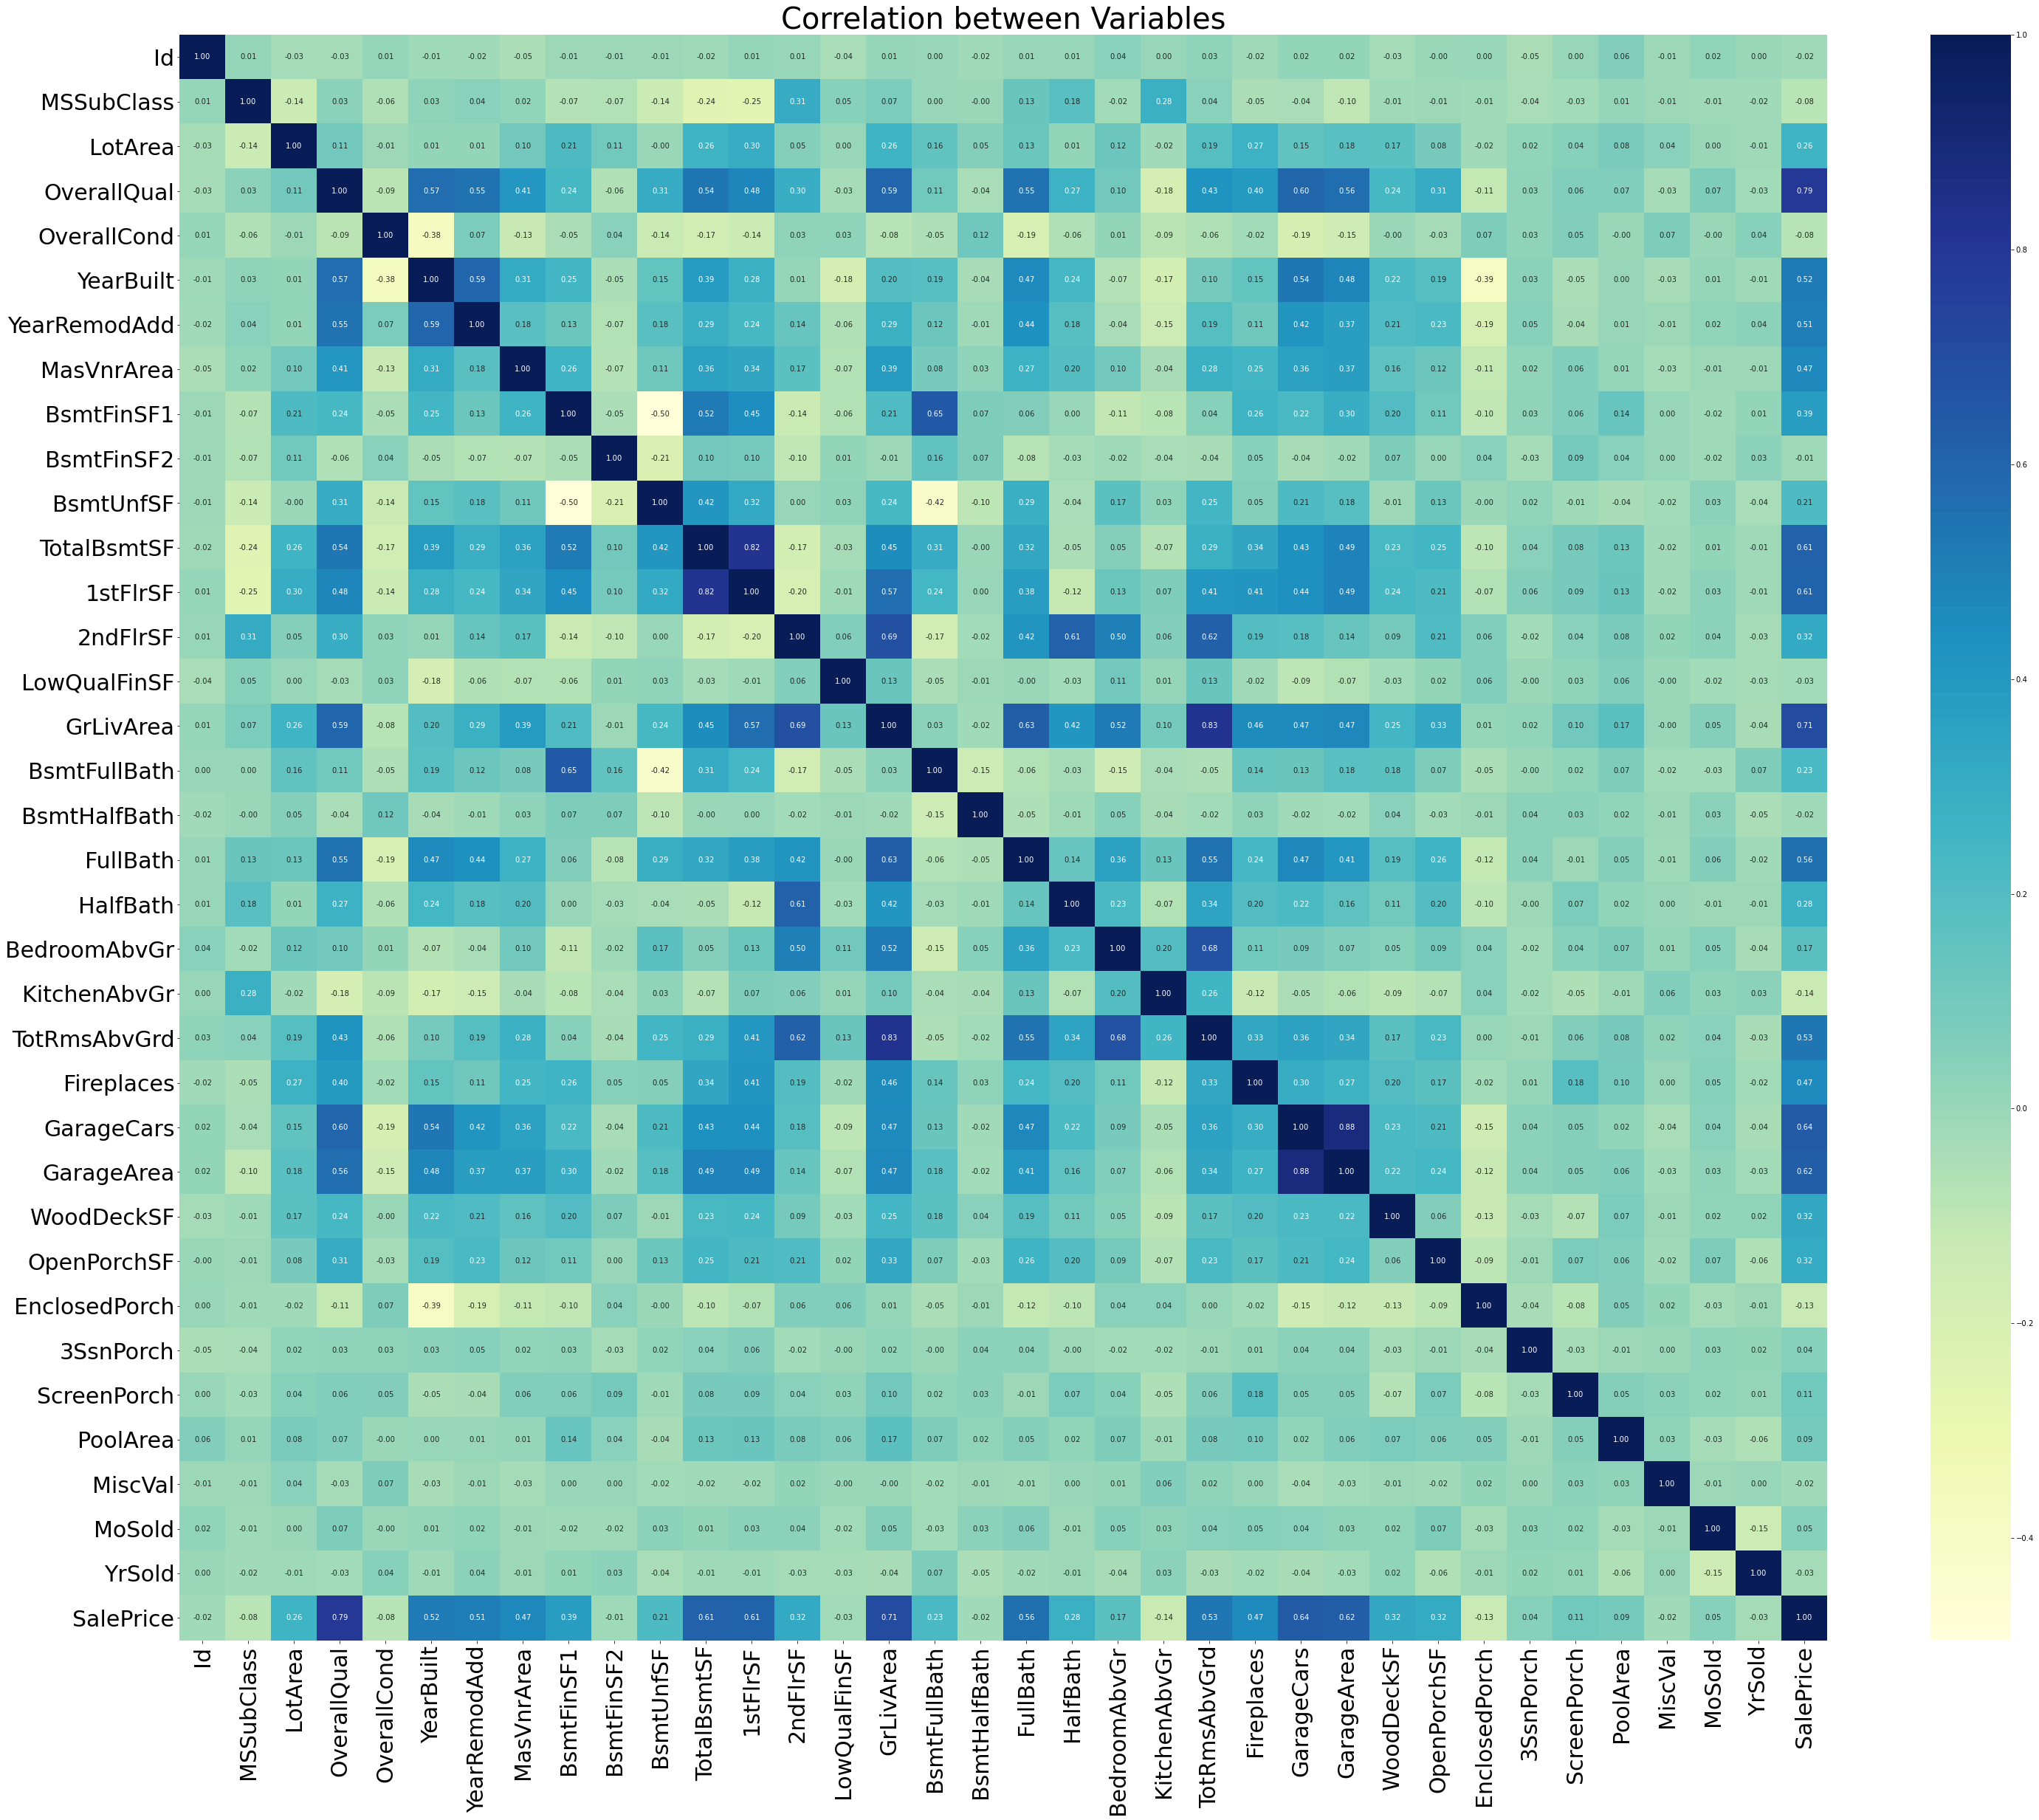

In [18]:
# plotting correlations on a heatmap

plt.figure(figsize=(50,40))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Correlation between Variables", fontsize=40)
plt.show()

###### Observation:
Yearbuilt and GarageYrBlt are highly correlated

TotRmsAbvGrd and GrLivArea are highly correlated

GarageArea and GarageCars are highly correlated

1stFlrSF and TotalBsmtSF are highly correlated

In [19]:
df.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea', 'GarageYrBlt'], axis=1,inplace=True)
df.shape

(1460, 71)

### Data preparation

#### Creating dummy variables

In [20]:
#Check which columns containg categorical data
cat_feat=df.select_dtypes(include=['object'])
cat_feat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
# Convert categorical value into Dummy variables (one hot encoding)
cat_dummies=pd.get_dummies(cat_feat,drop_first=True)
cat_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_Other,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0

Splitting the columns into numerical and categorical data fields on the basis of the provided data dictionary.

In [25]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [24]:
categorical_cols = df.select_dtypes(exclude=[np.number])
categorical_cols.columns

Index([], dtype='object')

### Creating Dummy Variables

In [23]:
houses=df
houses.drop(cat_feat.columns, axis=1, inplace=True)
houses = pd.concat([houses, cat_dummies], axis=1)
houses.shape

KeyError: "['MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig'\n 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'\n 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'\n 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'\n 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'\n 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'GarageType'\n 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive' 'SaleType'\n 'SaleCondition'] not found in axis"

## Data preparation and Modelling

In [30]:
# Outlier handling
def drop_outliers(df=houses):
    """
        Drop records with outliers present
        Lower quantile is .25, Upper quantile is .99
    """
    for column in numerical_cols:
        Q1 = df[column].quantile(.25)
        Q3 = df[column].quantile(.99)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - (1.5 * IQR))) & df[column] <= (Q3 + (1.5 * IQR))]
    return df

In [31]:
houses = drop_outliers(houses)
houses.shape

(1336, 269)

In [32]:
# Splitting into Test and Train set
y = houses.pop('SalePrice')
X = houses

In [33]:
# Running the standard scaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [34]:
# Generating a 70:30 split using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

## Model Building

### Building a Simple Linear Regression model

In [35]:
# linear regression model with all the variables
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predicting on the train set
y_train_pred = lr.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred)

0.9521114889125379

In [37]:
# Predicting on the test set
y_test_pred = lr.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred)

0.8311230217826845

In [38]:
# Checking the parameters of the Linear Regression model
print(lr.intercept_)
list(zip(list(lr.coef_), X.columns))

-1160209.5022463317


[(0.7110329891626694, 'LotArea'),
 (207.164166021046, 'YearBuilt'),
 (49.04569774600614, 'YearRemodAdd'),
 (11.161609746464336, 'MasVnrArea'),
 (15.440583660849938, 'BsmtFinSF1'),
 (7.599548569951537, 'BsmtFinSF2'),
 (0.3196694590008633, 'BsmtUnfSF'),
 (23.35974238559845, 'TotalBsmtSF'),
 (11.108493295594485, '1stFlrSF'),
 (23.796601864936434, '2ndFlrSF'),
 (11.253114569523149, 'LowQualFinSF'),
 (46.15828684007431, 'GrLivArea'),
 (-265.05989263971304, 'BsmtFullBath'),
 (3933.1164647060755, 'BsmtHalfBath'),
 (2002.7783526702326, 'FullBath'),
 (1655.5948276781726, 'HalfBath'),
 (-3422.1083593280246, 'BedroomAbvGr'),
 (-18211.223712038238, 'KitchenAbvGr'),
 (-811.6602368650454, 'TotRmsAbvGrd'),
 (4219.939895725928, 'Fireplaces'),
 (-31.284484148136585, 'GarageYrBlt'),
 (4660.327825905903, 'GarageCars'),
 (7.5633707181451655, 'GarageArea'),
 (15.21343889740615, 'WoodDeckSF'),
 (14.674567742382663, 'OpenPorchSF'),
 (16.272938728454676, 'EnclosedPorch'),
 (22.27717220645161, '3SsnPorch'),
 (

----

## Building the model using Ridge Regression

In [39]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge=Ridge()

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012566,6.357203e-03,0.004388,1.493203e-03,0.0001,{'alpha': 0.0001},-23180.200314,-20184.698421,-15849.456480,-21827.852255,-23758.278535,-20960.097201,2836.602450,26,-11011.095711,-10969.413060,-11409.848160,-10808.101958,-10180.453095,-10875.782397,400.091518
1,0.008577,4.886946e-04,0.003191,3.988744e-04,0.001,{'alpha': 0.001},-22967.692649,-20054.128633,-15924.104583,-21811.617097,-23724.564123,-20896.421417,2777.031892,25,-10998.533353,-10973.459896,-11411.529168,-10809.481764,-10186.851612,-10875.971159,397.656766
2,0.008179,1.595652e-03,0.003590,4.887529e-04,0.01,{'alpha': 0.01},-21553.509436,-19402.284236,-16494.378628,-21687.435576,-23490.716279,-20525.664831,2396.287057,24,-11081.416623,-11186.009738,-11535.657543,-10822.167306,-10339.255610,-10992.901364,399.027055
3,0.007181,3.989937e-04,0.003391,4.890449e-04,0.05,{'alpha': 0.05},-20276.174454,-19090.876758,-17716.122342,-21409.117024,-23490.399184,-20396.537952,1974.900507,23,-11879.869128,-12084.462564,-12347.454739,-10858.829180,-11007.159386,-11635.554999,594.338738
4,0.007581,4.887143e-04,0.003190,3.996379e-04,0.1,{'alpha': 0.1},-19942.271310,-19084.761691,-18091.308287,-21206.003272,-23585.885279,-20382.045968,1900.911325,22,-12486.807542,-12588.897413,-12844.730173,-10886.018012,-11442.421393,-12049.774907,753.234741
5,0.007580,4.883443e-04,0.002991,4.101908e-07,0.2,{'alpha': 0.2},-19487.314870,-19012.889160,-18182.382974,-20944.627545,-23583.473166,-20242.137543,1896.386758,20,-13000.320171,-13004.677617,-13256.278136,-10930.618156,-11796.092852,-12397.597386,892.523340
6,0.007381,4.887335e-04,0.003590,4.885001e-04,0.3,{'alpha': 0.3},-19186.417315,-18864.426315,-18077.742926,-20740.264831,-23570.941836,-20087.958644,1944.605391,19,-13228.473591,-13198.186039,-13440.111768,-10969.090554,-11955.742303,-12558.320851,951.298189
7,0.007580,4.886166e-04,0.003191,3.989698e-04,0.4,{'alpha': 0.4},-18986.155004,-18716.633831,-17927.524685,-20581.303187,-23536.565013,-19949.636344,1990.104888,18,-13354.995583,-13313.871846,-13547.396192,-11000.461569,-12051.284743,-12653.601986,982.083158
8,0.007780,3.989935e-04,0.002991,9.536743e-08,0.5,{'alpha': 0.5},-18820.196188,-18583.648456,-17776.115521,-20445.380014,-23505.009932,-19826.070022,2033.511775,17,-13432.789494,-13390.806882,-13623.872663,-11029.916859,-12114.501373,-12718.377454,999.803278
9,0.007580,4.882273e-04,0.003191,3.993036e-04,0.6,{'alpha': 0.6},-18675.334843,-18467.783708,-17628.168586,-20331.724105,-23475.034365,-19715.609121,2074.103308,16,-13486.995444,-13450.029783,-13681.941528,-11057.424245,-12159.888576,-12767.255915,1011.263995


In [41]:
model_cv.best_params_

{'alpha': 10.0}

In [42]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

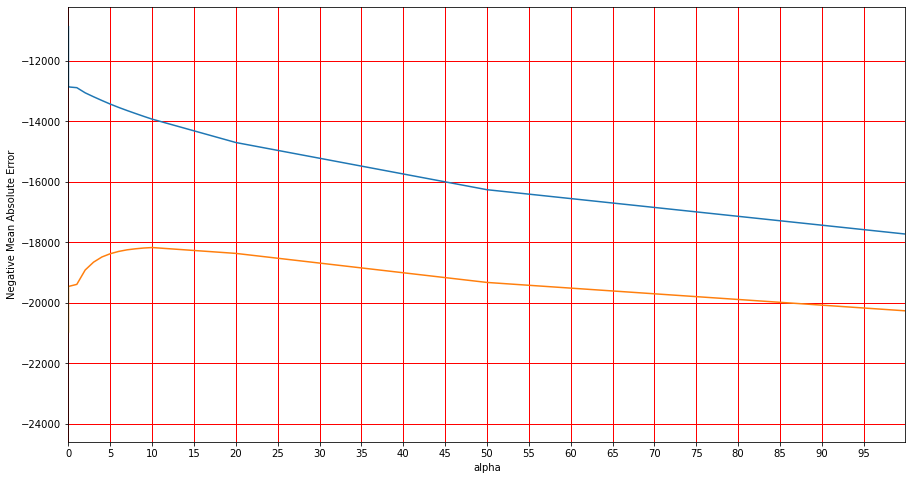

In [43]:
# Plotting the mean test and train scores

plt.figure(figsize=(15, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [44]:
# Setting alpha as 10, building a ridge regression model
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [45]:
# Predticting on X_train
y_train_pred_ridge = ridge.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred_ridge)

0.9102708640356322

In [46]:
# Predicting on the X_test
y_test_pred_ridge = ridge.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred_ridge)

0.8291066996854972

In [47]:
# checking the parameters of the Ridge Regression model
print(ridge.intercept_)
model_params_ridge = list(ridge.coef_)
model_params_ridge.insert(0, ridge.intercept_)
model_params_ridge = [round(x, 3) for x in model_params_ridge]
cols = X.columns
cols = cols.insert(0, 'constant')
sorted(list(zip(model_params_ridge, cols)), key=lambda x: abs(x[0]), reverse=True)

-358646.61392034416


[(-358646.614, 'constant'),
 (28515.5, 'RoofMatl_WdShngl'),
 (27042.781, 'Neighborhood_StoneBr'),
 (26168.788, 'OverallQual_9'),
 (22527.234, 'OverallQual_10'),
 (-19902.873, 'LotShape_IR3'),
 (19301.559, 'Neighborhood_NoRidge'),
 (-18810.805, 'KitchenQual_TA'),
 (-16924.258, 'KitchenQual_Gd'),
 (16369.044, 'Neighborhood_NridgHt'),
 (-14978.203, 'BsmtQual_Gd'),
 (14543.394, 'GarageCars'),
 (-13867.62, 'KitchenAbvGr'),
 (-13766.146, 'ExterQual_TA'),
 (13573.273, 'Functional_Typ'),
 (-13396.392, 'OverallQual_5'),
 (-12943.325, 'Neighborhood_SWISU'),
 (-12790.392, 'OverallCond_3'),
 (-12514.357, 'Neighborhood_Edwards'),
 (-12487.347, 'OverallQual_6'),
 (-12376.7, 'Exterior1st_Stucco'),
 (12273.504, 'BsmtExposure_Gd'),
 (-12054.172, 'BsmtQual_TA'),
 (11970.053, 'Exterior1st_BrkFace'),
 (-11813.314, 'OverallQual_4'),
 (11724.814, 'Neighborhood_Crawfor'),
 (-11568.08, 'MSSubClass_120'),
 (-11562.375, 'BldgType_TwnhsE'),
 (11403.382, 'SaleCondition_Partial'),
 (-11392.264, 'OverallCond_4'),
 

## Performing Lasso Regression

In [49]:
lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.112894,0.006689,0.003591,4.883831e-04,0.0001,{'alpha': 0.0001},-21872.883161,-20088.635953,-15758.484167,-22100.617383,-23774.529865,-20719.030106,2741.556195,27,-11014.843510,-10969.636627,-11409.193446,-10808.747474,-10180.463065,-10876.576824,400.158333
1,0.130648,0.013265,0.003790,1.163096e-03,0.001,{'alpha': 0.001},-21870.794562,-20074.675015,-15758.602678,-22101.634554,-23773.990146,-20715.939391,2741.967296,26,-11014.823078,-10969.657235,-11409.171924,-10808.767294,-10180.473683,-10876.578643,400.147784
2,0.118882,0.010430,0.003590,4.886750e-04,0.01,{'alpha': 0.01},-21853.162042,-20047.047702,-15759.788805,-22088.120018,-23768.549282,-20703.333570,2738.781932,25,-11014.781307,-10969.964927,-11409.182559,-10809.073822,-10180.647245,-10876.729972,400.091290
3,0.116688,0.003989,0.003789,3.988506e-04,0.05,{'alpha': 0.05},-21805.446311,-19904.263144,-15758.374652,-21975.046613,-23754.754126,-20639.576969,2728.145219,24,-11014.862267,-10971.405210,-11409.816441,-10810.589068,-10181.495347,-10877.633667,399.986708
4,0.107712,0.006705,0.003590,4.883635e-04,0.1,{'alpha': 0.1},-21759.386859,-19888.283670,-15747.021276,-21837.720518,-23743.697202,-20595.221905,2713.550830,23,-11015.059360,-10973.292894,-11410.715351,-10812.258962,-10182.767227,-10878.818759,399.829661
5,0.115292,0.004306,0.003590,4.885194e-04,0.2,{'alpha': 0.2},-21699.148113,-19856.033439,-15724.331734,-21840.449929,-23721.254567,-20568.243556,2713.287953,22,-11015.806586,-10977.153677,-11412.628570,-10815.591536,-10185.302316,-10881.296537,399.579873
6,0.111701,0.008078,0.003590,4.884805e-04,0.3,{'alpha': 0.3},-21638.447900,-19831.606350,-15702.257317,-21778.300087,-23698.927419,-20529.907815,2706.431743,21,-11016.474511,-10981.118096,-11414.497223,-10818.820861,-10187.697744,-10883.721687,399.372880
7,0.113505,0.008144,0.005186,2.917863e-03,0.4,{'alpha': 0.4},-21578.067745,-19810.349482,-15681.200050,-21720.070319,-23677.037628,-20493.345045,2699.651796,20,-11017.270497,-10984.927931,-11415.918104,-10822.206870,-10190.348896,-10886.134460,398.956591
8,0.110704,0.006433,0.003391,4.889865e-04,0.5,{'alpha': 0.5},-21522.131199,-19789.656761,-15659.642379,-21679.829378,-23652.209495,-20460.693842,2694.405270,19,-11018.596462,-10988.728491,-11417.081906,-10825.388254,-10192.835743,-10888.526171,398.572834
9,0.111701,0.004592,0.003790,3.991128e-04,0.6,{'alpha': 0.6},-21469.545731,-19770.612170,-15638.660396,-21652.376568,-23627.000449,-20431.639063,2690.255964,18,-11020.288917,-10992.386796,-11417.838093,-10829.405343,-10195.637751,-10891.111380,397.963762


In [51]:
model_cv.best_params_

{'alpha': 100}

In [52]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

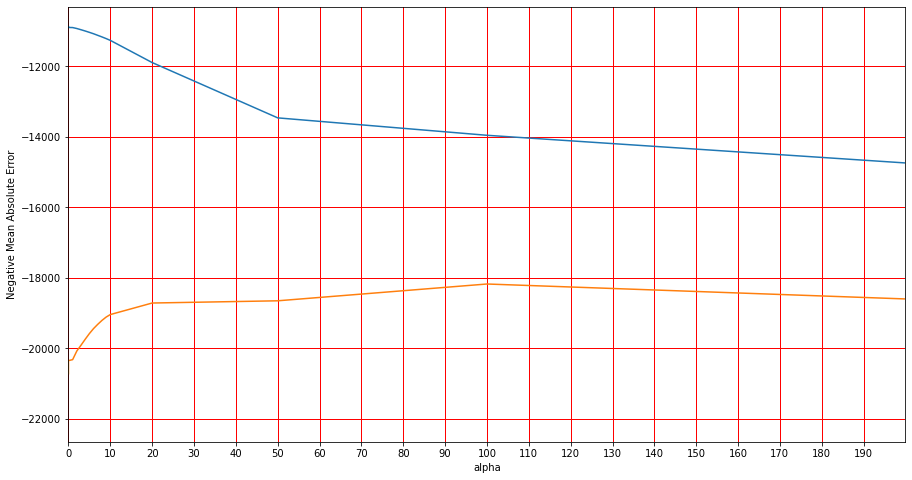

In [53]:
# Plotting the mean test and train scores
plt.figure(figsize=(15, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [54]:
# Setting alpha as 100, building a lasso regression model
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [55]:
# Predicting on X_train
y_train_pred_lasso = lasso.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred_lasso)

0.9127400949466069

In [56]:
# Predicting on X_test
y_test_pred_lasso = lasso.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred_lasso)

0.8226115465655931

In [57]:
# checking the parameters of the Lasso Regression model
model_params_lasso = list(lasso.coef_)
model_params_lasso.insert(0, lasso.intercept_)
model_params_lasso = [round(x, 3) for x in model_params_lasso]
cols = X.columns
cols = cols.insert(0, 'constant')
lasso_selected_features = []
for k, v in sorted(list(zip(model_params_lasso, cols)), key=lambda x:abs(x[0]), reverse=True)[1:131]:
    lasso_selected_features.append(v)
sorted(list(zip(model_params_lasso, cols)), key=lambda x: abs(x[0]), reverse=True)

[(-1586516.611, 'constant'),
 (70839.234, 'RoofMatl_WdShngl'),
 (53343.494, 'OverallQual_10'),
 (45121.688, 'OverallQual_9'),
 (-43831.323, 'LotShape_IR3'),
 (40420.806, 'Neighborhood_StoneBr'),
 (27555.031, 'Neighborhood_NoRidge'),
 (22722.148, 'SaleCondition_Partial'),
 (21939.529, 'Neighborhood_NridgHt'),
 (-20124.624, 'KitchenAbvGr'),
 (-19233.999, 'KitchenQual_TA'),
 (-18166.271, 'OverallCond_3'),
 (-16982.411, 'KitchenQual_Gd'),
 (-16743.144, 'OverallCond_4'),
 (-16647.628, 'Exterior1st_Stucco'),
 (15097.117, 'Neighborhood_Crawfor'),
 (-14228.874, 'BldgType_TwnhsE'),
 (13972.23, 'GarageCars'),
 (-13942.52, 'BsmtQual_Gd'),
 (13275.448, 'OverallQual_8'),
 (13116.707, 'BsmtExposure_Gd'),
 (-13116.102, 'Neighborhood_SWISU'),
 (12960.936, 'Functional_Typ'),
 (-12798.205, 'BldgType_Twnhs'),
 (11458.26, 'Exterior1st_BrkFace'),
 (-11107.081, 'BsmtQual_TA'),
 (-10888.329, 'Neighborhood_Edwards'),
 (10709.009, 'MSSubClass_70'),
 (10616.819, 'LotConfig_CulDSac'),
 (-10615.993, 'HouseStyle_2

In [58]:
lasso_selected_features

['RoofMatl_WdShngl',
 'OverallQual_10',
 'OverallQual_9',
 'LotShape_IR3',
 'Neighborhood_StoneBr',
 'Neighborhood_NoRidge',
 'SaleCondition_Partial',
 'Neighborhood_NridgHt',
 'KitchenAbvGr',
 'KitchenQual_TA',
 'OverallCond_3',
 'KitchenQual_Gd',
 'OverallCond_4',
 'Exterior1st_Stucco',
 'Neighborhood_Crawfor',
 'BldgType_TwnhsE',
 'GarageCars',
 'BsmtQual_Gd',
 'OverallQual_8',
 'BsmtExposure_Gd',
 'Neighborhood_SWISU',
 'Functional_Typ',
 'BldgType_Twnhs',
 'Exterior1st_BrkFace',
 'BsmtQual_TA',
 'Neighborhood_Edwards',
 'MSSubClass_70',
 'LotConfig_CulDSac',
 'HouseStyle_2Story',
 'BsmtQual_Fa',
 'Condition1_Feedr',
 'MSSubClass_120',
 'BsmtFinType1_GLQ',
 'BsmtFinType2_Rec',
 'HouseStyle_1Story',
 'OverallCond_5',
 'OverallQual_5',
 'SaleCondition_Alloca',
 'Exterior2nd_Wd Shng',
 'BsmtFinType1_Unf',
 'RoofMatl_CompShg',
 'SaleCondition_Normal',
 'Exterior2nd_Stucco',
 'OverallQual_4',
 'ExterQual_TA',
 'Fireplaces',
 'OverallQual_6',
 'GarageQual_Fa',
 'Neighborhood_Somerst',
 '

#### The top 30 most important features using lasso are:

In [60]:
for feature in lasso_selected_features[:31]:
    print(f"- {feature}")

- RoofMatl_WdShngl
- OverallQual_10
- OverallQual_9
- LotShape_IR3
- Neighborhood_StoneBr
- Neighborhood_NoRidge
- SaleCondition_Partial
- Neighborhood_NridgHt
- KitchenAbvGr
- KitchenQual_TA
- OverallCond_3
- KitchenQual_Gd
- OverallCond_4
- Exterior1st_Stucco
- Neighborhood_Crawfor
- BldgType_TwnhsE
- GarageCars
- BsmtQual_Gd
- OverallQual_8
- BsmtExposure_Gd
- Neighborhood_SWISU
- Functional_Typ
- BldgType_Twnhs
- Exterior1st_BrkFace
- BsmtQual_TA
- Neighborhood_Edwards
- MSSubClass_70
- LotConfig_CulDSac
- HouseStyle_2Story
- BsmtQual_Fa
- Condition1_Feedr


#### From these we can understand the major features from the initials columns that influence the Sales Price

#### Some of the major influencers are:
- __OverallQual__
- __OverAllCond__
- __Neighborhood__
- __KitchenQual__
- __BsmtQual__
- __SaleCondition__
- __GarageCars__